In [42]:
import pandas as pd
import os

#whose folder do we go into
name = 'tory'

cwd = os.getcwd()
if cwd != 'C:\\Users\\tory\\Desktop\\personal':
    os.chdir('..')
os.chdir('C:\\Users\\tory\\Desktop\\personal')
os.chdir(name)
cwd = os.getcwd()
cwd


In [43]:
watched_df = pd.read_csv ("watched.csv")
watched_df = watched_df.rename(columns={'release year': 'release'})
rated_df = pd.read_csv ("ratings.csv")
rated_df = rated_df.rename(columns={'release year': 'release'})
rated_df

,Date,Name,Year,Letterboxd URI,Rating
0,2022-09-30,Megamind,2010,https://boxd.it/16Sk,4.0
1,2022-09-30,(500) Days of Summer,2009,https://boxd.it/1EmM,2.0
2,2022-09-30,The Proposal,2009,https://boxd.it/1HiS,4.0
3,2022-09-30,Up,2009,https://boxd.it/1OEc,2.5
4,2022-09-30,Wild Child,2008,https://boxd.it/1P0C,4.0
...,...,...,...,...,...
1203,2023-05-24,High School Musical,2006,https://boxd.it/1V0y,3.0
1204,2023-05-24,Clueless,1995,https://boxd.it/1Ygk,3.5
1205,2023-05-24,American Psycho,2000,https://boxd.it/28Vs,2.5
1206,2023-05-24,Yes Man,2008,https://boxd.it/1WPW,2.5


In [44]:
w_years = watched_df.loc[:,'Year']
r_years = rated_df.loc[:,'Year']
r_years

0       2010
1       2009
2       2009
3       2009
4       2008
        ... 
1203    2006
1204    1995
1205    2000
1206    2008
1207    2004
Name: Year, Length: 1208, dtype: int64

In [45]:
from collections import Counter
import matplotlib.pyplot as plt

w_counts = Counter(w_years)
print(len(w_counts))
r_counts = Counter(r_years)

71


In [46]:
highestY =0
highestV =0
for key, value in w_counts.items():
    if value > highestV:
        highestY = key
        highestV = value

In [47]:
oldies =0
for key, value in w_counts.items():
    if key < 1980:
        oldies += value
oldies

39

In [48]:
ratings = rated_df.loc[:,'Rating']


In [49]:
year_maths ={}
#for loop through years making a new line with that year and value 0
null_vals = [0] * len(rated_df)
year_maths = dict(zip(w_years, null_vals))


your most watched year:  2011  with  69  movies


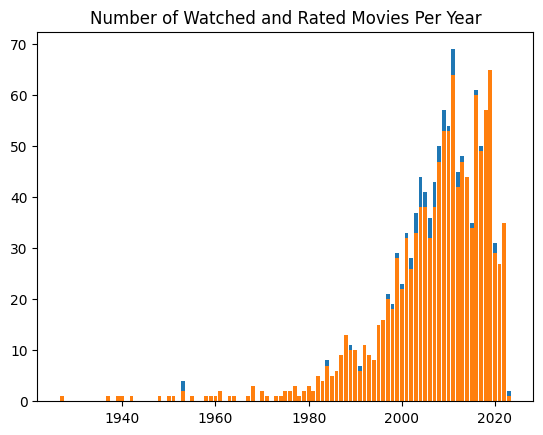

In [50]:
plt.bar(w_counts.keys(), w_counts.values())
plt.bar(r_counts.keys(), r_counts.values())
plt.title("Number of Watched and Rated Movies Per Year")
print("your most watched year: ",highestY, " with ",highestV," movies")


In [51]:
unbalanced = False
if len(r_years) != len(w_years):
    unbalanced = True
    print("you have not rated all of the films you've watched, so your data is not fully accurate, \ncheck below if you'd like to remove short films")

you have not rated all of the films you've watched, so your data is not fully accurate, 
check below if you'd like to remove short films


In [52]:
#toggle this if you'd like to ignore films below one hour or look at them seperately
#TODO
indShorts = False
indLook = False

In [53]:
total_avg = 0
for i in range(len(rated_df)):
    if year_maths.get(r_years.get(i)) is None:
        print("aye yo")
    else:
        sum = year_maths.get(r_years.get(i)) + ratings.get(i)
        year_maths.update({r_years.get(i): sum})
        total_avg += rated_df.loc[i, 'Rating']

aye yo
aye yo


In [54]:
allyear_maths ={}
highest_avg  =0
highest_year = 0
for key, value in year_maths.items():
    if r_counts.get(key) is not None:
        count = r_counts.get(key)
        avg = value/count
        if highest_avg< avg:
            highest_avg = avg
            highest_year = key
        allyear_maths.update({key: avg})

In [55]:
high5  =0
high5avg = 0
year5maths ={}
low5= 2050
low5avg = 10

for key, value in year_maths.items():
    if r_counts.get(key) is not None:
        count = r_counts.get(key)
        if count >=5:
            avg = value/count
            if high5avg< avg:
                high5avg = avg
                high5 = key
            if low5avg> avg:
                low5avg = avg
                low5 = key
            year5maths.update({key: avg})

In [56]:
year6maths ={}
#for loop through years making a new line with that year and value 0
null_vals = [0] * len(rated_df)
year6maths = dict(zip(w_years, null_vals))

In [57]:
for i in range(len(rated_df)):
    if ratings.get(i) >= 3:
        if r_counts.get(i) is not None:
            sum = year_maths.get(r_years.get(i)) + ratings.get(i)
            year6maths.update({r_years.get(i): sum})

In [58]:
high  =0
high6avg = 0
year6mathsavg ={}

for key, value in year6maths.items():
    if r_counts.get(key) is not None:
        count = r_counts.get(key)
        if count >=5:
            avg = value/count
            if high6avg< avg:
                high6avg = avg
                high6 = key
            year6mathsavg.update({key: avg})

In [59]:
ynr = list(zip(r_years, ratings))
counts4= dict(zip(r_years, null_vals))
for i, j in ynr:
    if j >=4:
        newc = counts4.get(i) +1
        counts4.update({i: newc})

In [60]:
vol4 = 0
year4 = 0

for key, value in counts4.items():
    if value > vol4:
        vol4 = value
        year4 = key

In [61]:
ynr = list(zip(r_years, ratings))
counts1_5= dict(zip(r_years, null_vals))
for i, j in ynr:
    if j <=1.5:
        newc = counts1_5.get(i) +1
        counts1_5.update({i: newc})

In [62]:
year2_5 = 0
vol2_5 = 0

for key, value in counts1_5.items():
    if value > vol2_5:
        year2_5 = key
        vol2_5 = value

In [63]:
print("your total average movie rating: {:0.2f}".format(total_avg/len(rated_df)))
print("year with the highest average ratings: ", highest_year, " with an avg of: ", highest_avg)
print("however you only saw: ", r_counts.get(highest_year), "movies that year,,, soooo taking that into account")
print("\n")
print("let's only look at years that you've seen more than 5 movies from")
print("\n")
print("your highest rated year is:", high5, "with an avg of:{:0.2f}".format(high5avg), " with ",r_counts.get(high5), "movies that year")
print("that feels weird, so just in general, the year you've rated the most films at 4★ or higher: ", year4, " with ", vol4, " movies")
print("\n")
print("how about worst movies! your lowest rated year is: ", low5, "at: {:0.2f}".format(low5avg), " with ",r_counts.get(low5), "movies that year")
print("that also feels weird! but the year you've rated the most films at 1.5★ or lower: ", year2_5, " with ", vol2_5, " unfortunate movies")


your total average movie rating: 2.62
year with the highest average ratings:  1979  with an avg of:  4.25
however you only saw:  2 movies that year,,, soooo taking that into account


let's only look at years that you've seen more than 5 movies from


your highest rated year is: 1996 with an avg of:3.19  with  16 movies that year
that feels weird, so just in general, the year you've rated the most films at 4★ or higher:  2019  with  18  movies


how about worst movies! your lowest rated year is:  1987 at: 1.94  with  9 movies that year
that also feels weird! but the year you've rated the most films at 1.5★ or lower:  2016  with  17  unfortunate movies


Text(0.5, 1.0, 'Average rating per year')

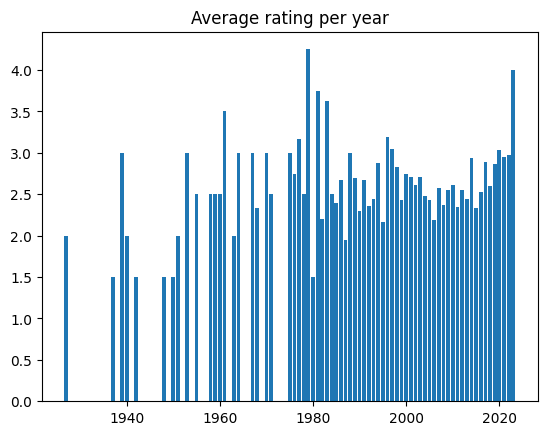

In [64]:
plt.bar(allyear_maths.keys(), allyear_maths.values())
plt.title("Average rating per year")

Text(0.5, 1.0, 'Average Rating For Each Year With More Than 5 Ratings')

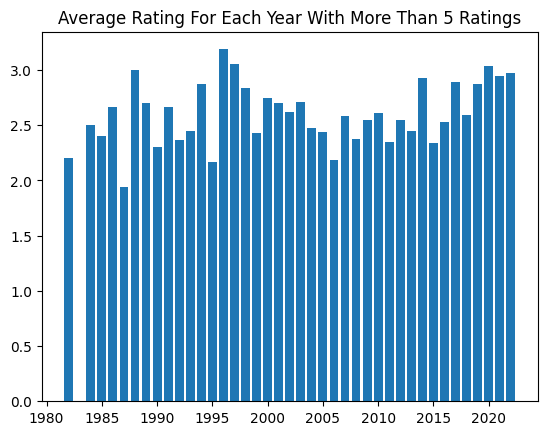

In [65]:
plt.bar(year5maths.keys(), year5maths.values())
plt.title("Average Rating For Each Year With More Than 5 Ratings")